*Deliverables*:


*   City wise of start-up
*   state wise on start-up
*   current employee and job opening analysis
*   Effect of state on start-up's revenue
*   Effect of industry on growth of start-up
*   Effect of Employee count on the city ranking
*   Heat map










In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import os

In [ ]:
#loading the CSV
df = pd.read_csv('/content/Startup_statewise_cleaned.csv')

In [ ]:
df.head()

company_name         city  ... job_openings  growth_percentage
0  Bind On-Demand  Minneapolis  ...            7                30%
1          Level2   Minnetonka  ...           10               341%
2   Bright Health  Minneapolis  ...          135                60%
3          Sezzle  Minneapolis  ...           52               105%
4             75F   Burnsville  ...            8                12%

[5 rows x 10 columns]

In [ ]:
#getting info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        3672 non-null   object 
 1   city                3672 non-null   object 
 2   state               3672 non-null   object 
 3   employees           3672 non-null   int64  
 4   founded             2936 non-null   float64
 5   Industry            3669 non-null   object 
 6   CityRanking         3672 non-null   int64  
 7   estimated_revenues  3672 non-null   float64
 8   job_openings        3672 non-null   int64  
 9   growth_percentage   3672 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 287.0+ KB


In [ ]:
df.describe()

employees      founded  CityRanking  estimated_revenues  job_openings
count  3672.000000  2936.000000  3672.000000        3.672000e+03   3672.000000
mean    148.497004  2002.762943  1737.099401        3.173374e+07      6.854575
std     159.355941    23.618901  2293.206667        4.898746e+07     19.267521
min      23.000000  1790.000000     1.000000        0.000000e+00      0.000000
25%      57.000000  2001.000000    34.000000        1.218000e+07      1.000000
50%      88.000000  2011.500000   189.500000        2.079150e+07      1.000000
75%     167.000000  2015.000000  3231.500000        3.173374e+07      1.000000
max     990.000000  2020.000000  8024.000000        2.070000e+09    220.000000

In [ ]:
#percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

company_name - 0%
city - 0%
state - 0%
employees - 0%
founded - 20%
Industry - 0%
CityRanking - 0%
estimated_revenues - 0%
job_openings - 0%
growth_percentage - 0%


In [ ]:
#removing empty space
df['state'] = df['state'].replace({' ':''}, regex = True)

#converting all state name to uppercase
df['state'] = df['state'].str.upper()

In [ ]:
df['state'].value_counts().sum()

3672

In [ ]:
#df['founded'] = df['founded'].fillna(0)

In [ ]:
#df['founded']=df['founded'].astype('int64')

# City wise start-up count.

In [ ]:
city_startup = df['city'].value_counts().sort_values(ascending=False)
print(city_startup)

New York         89
Chicago          75
Atlanta          71
Seattle          63
Las Vegas        60
                 ..
Groton            1
Waterville        1
Hampton Falls     1
Slidell           1
Chesapeake        1
Name: city, Length: 1114, dtype: int64


**New York and Chicago** create higher no of startup.

# State wise start-up count

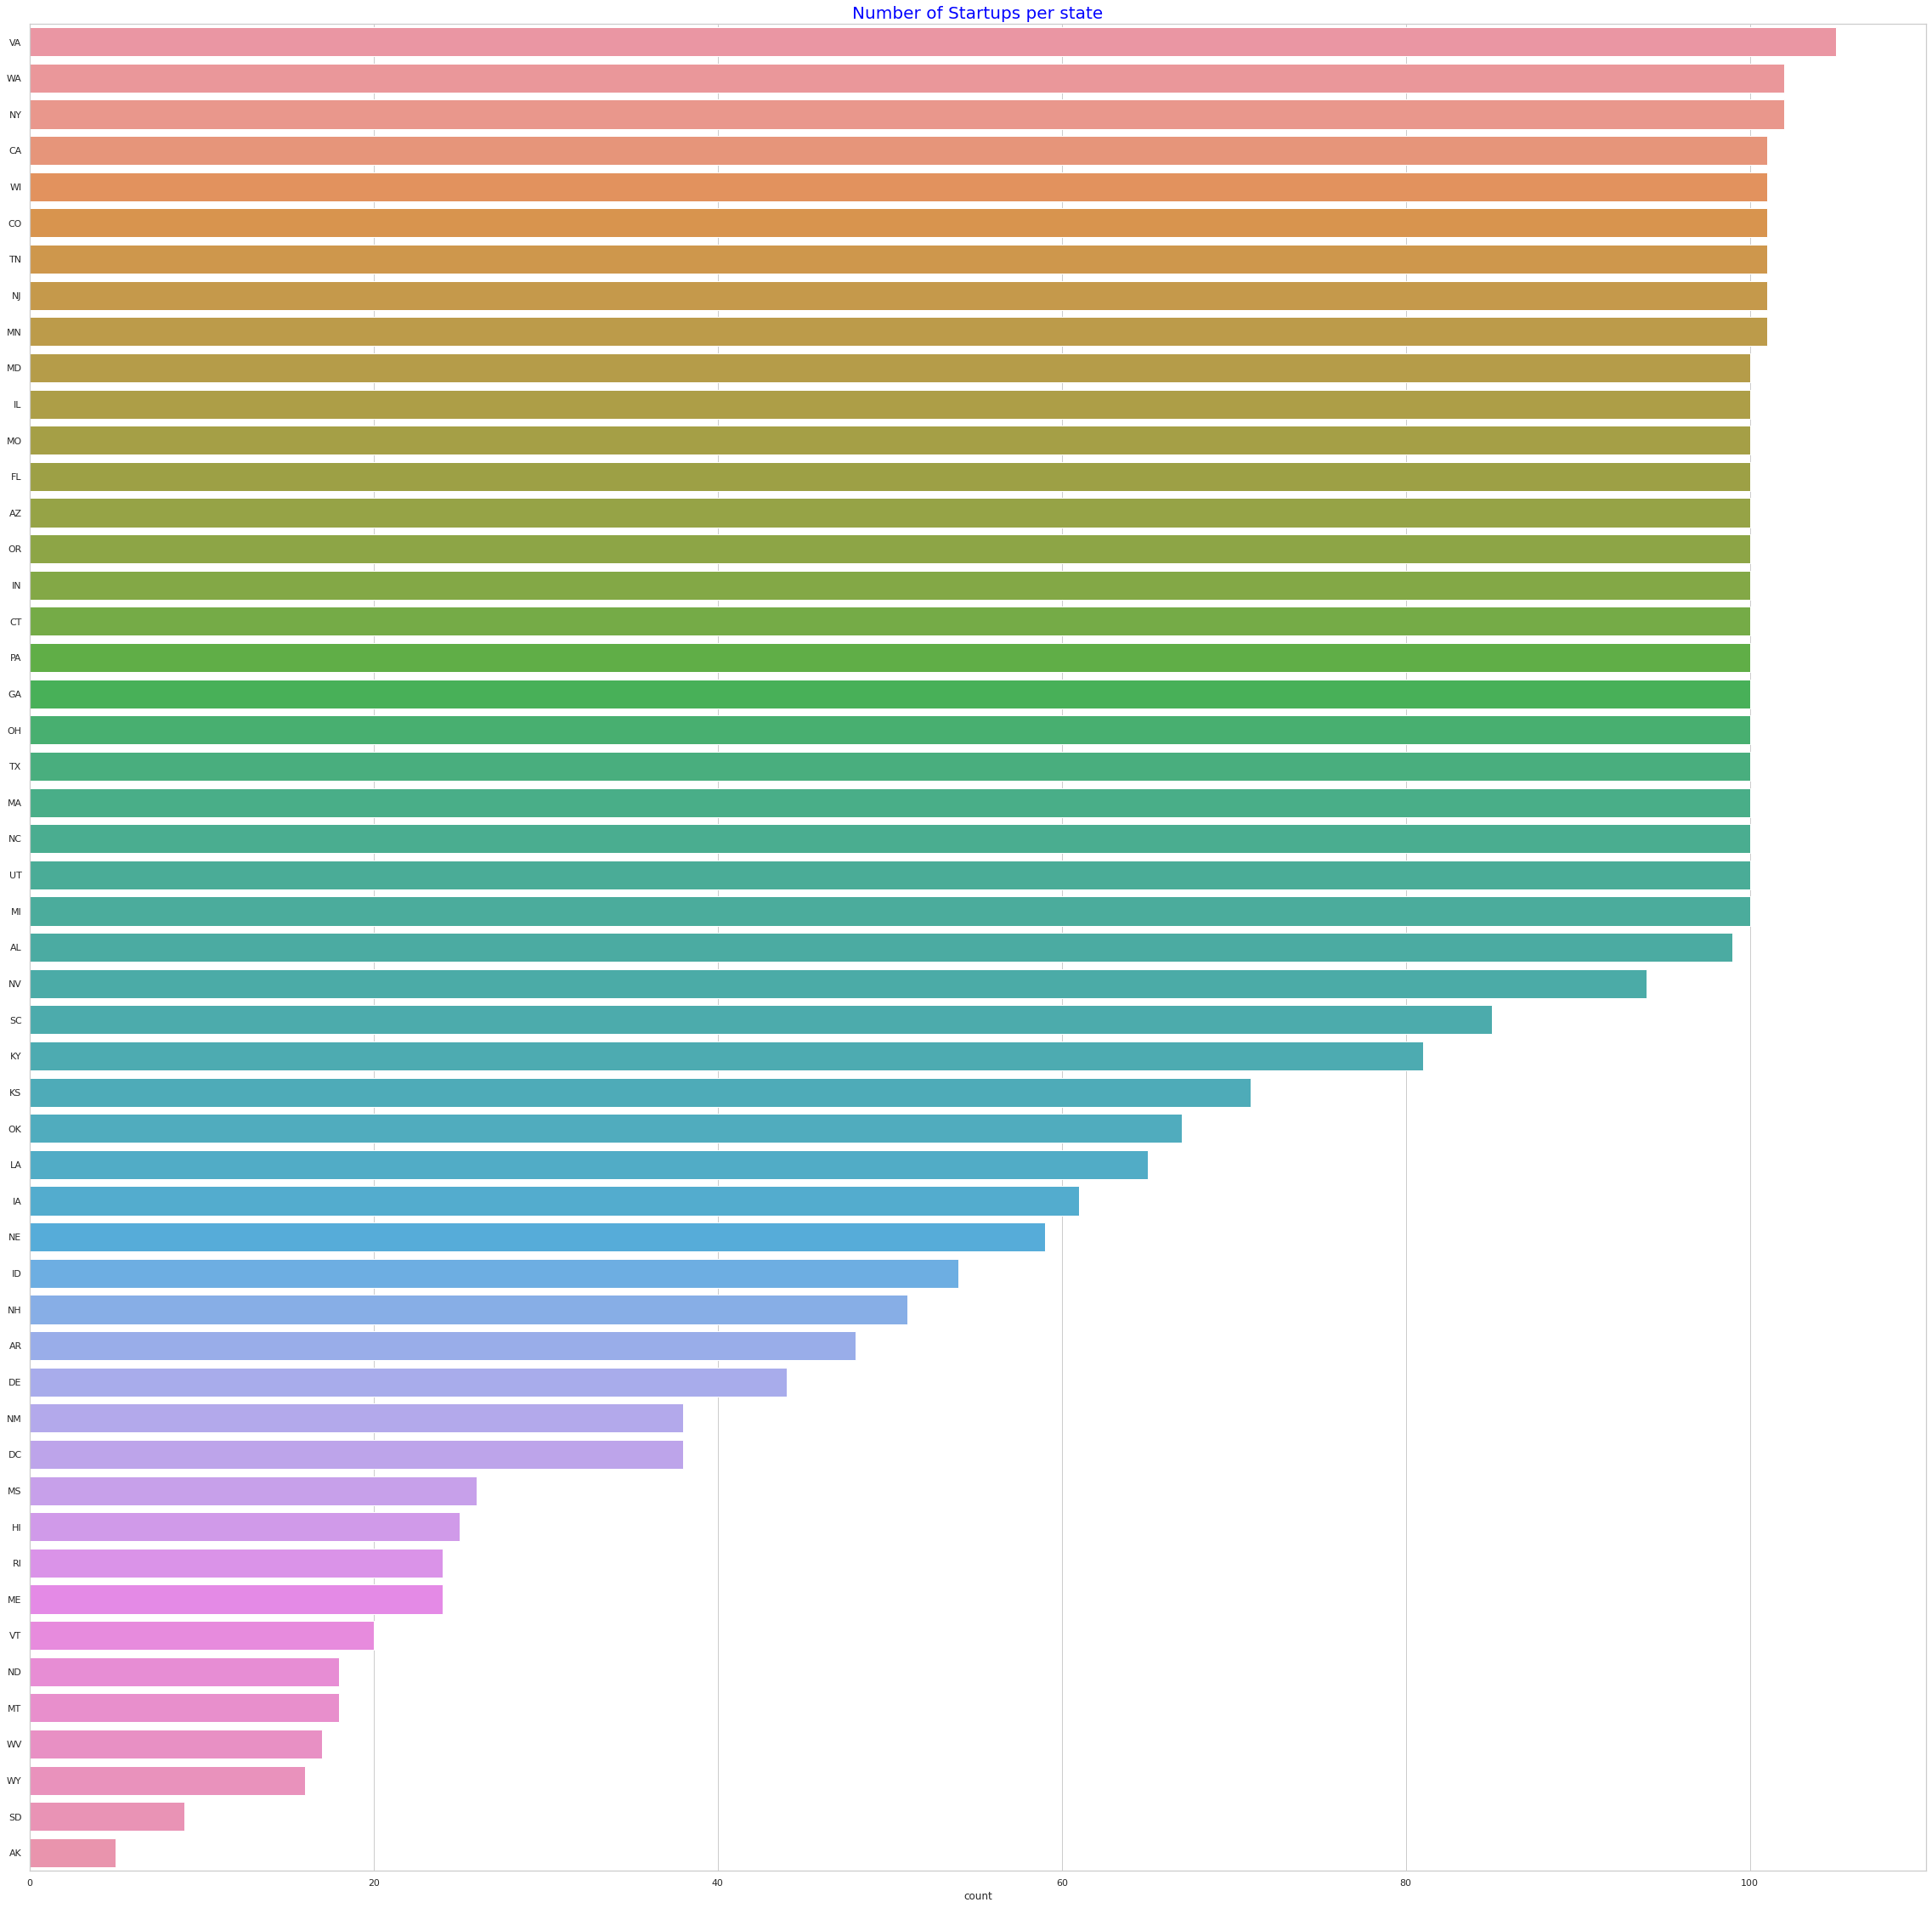

In [ ]:
#Startups by State
fig, ax = plt.subplots(figsize=(40,40))
sns.set(style="whitegrid")
sns.countplot(y='state',data=df,ax=ax,order=df.state.value_counts().index)
plt.title('Number of Startups per state',fontsize=20,color='Blue')
plt.ylabel(None)
plt.show()

dataset contain some what balaced no of start-up from each state

# How are **current employee** and **job opening** in start-up statewise

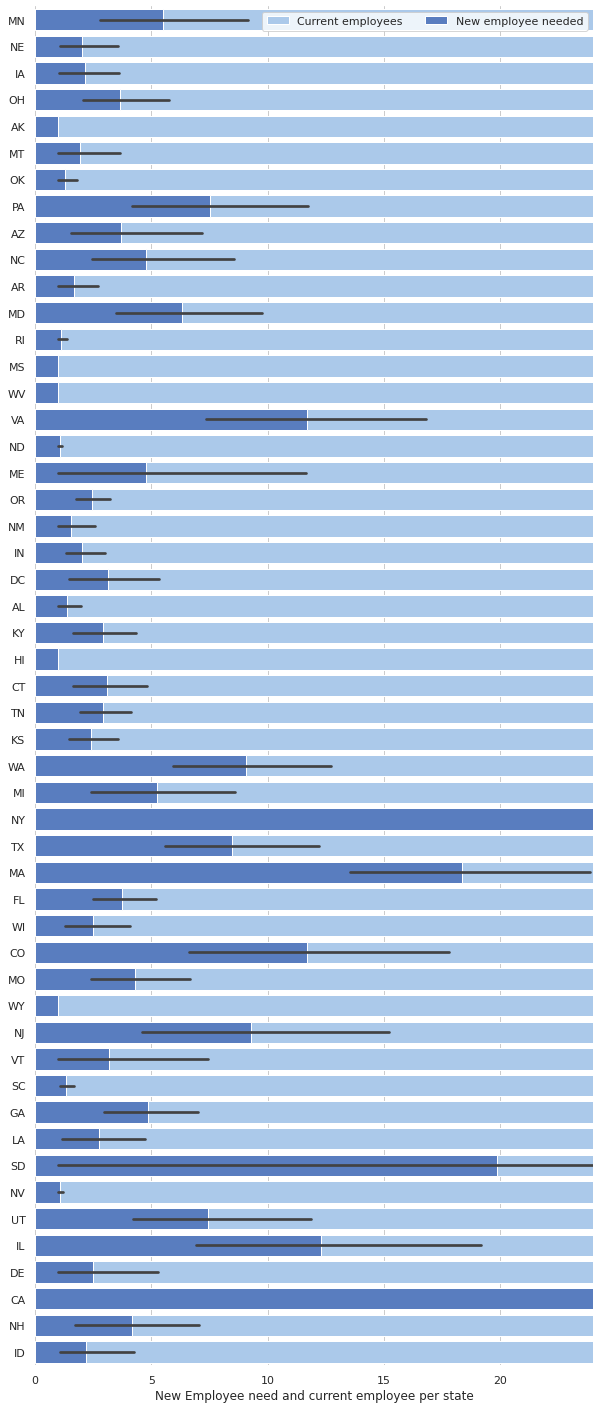

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 25))

# Plot the total employees current have 
sns.set_color_codes("pastel")
sns.barplot(x="employees", y="state", data=df,
            label="Current employees", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="job_openings", y="state", data=df,
            label="New employee needed", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="New Employee need and current employee per state")
sns.despine(left=True, bottom=True)

some state like **SD(South Dakota),MA(Massachusetts),VA(Virginia),NY(New york),CA(California)** has higer demand of new employees.

# Statewise revenue of the start-ups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



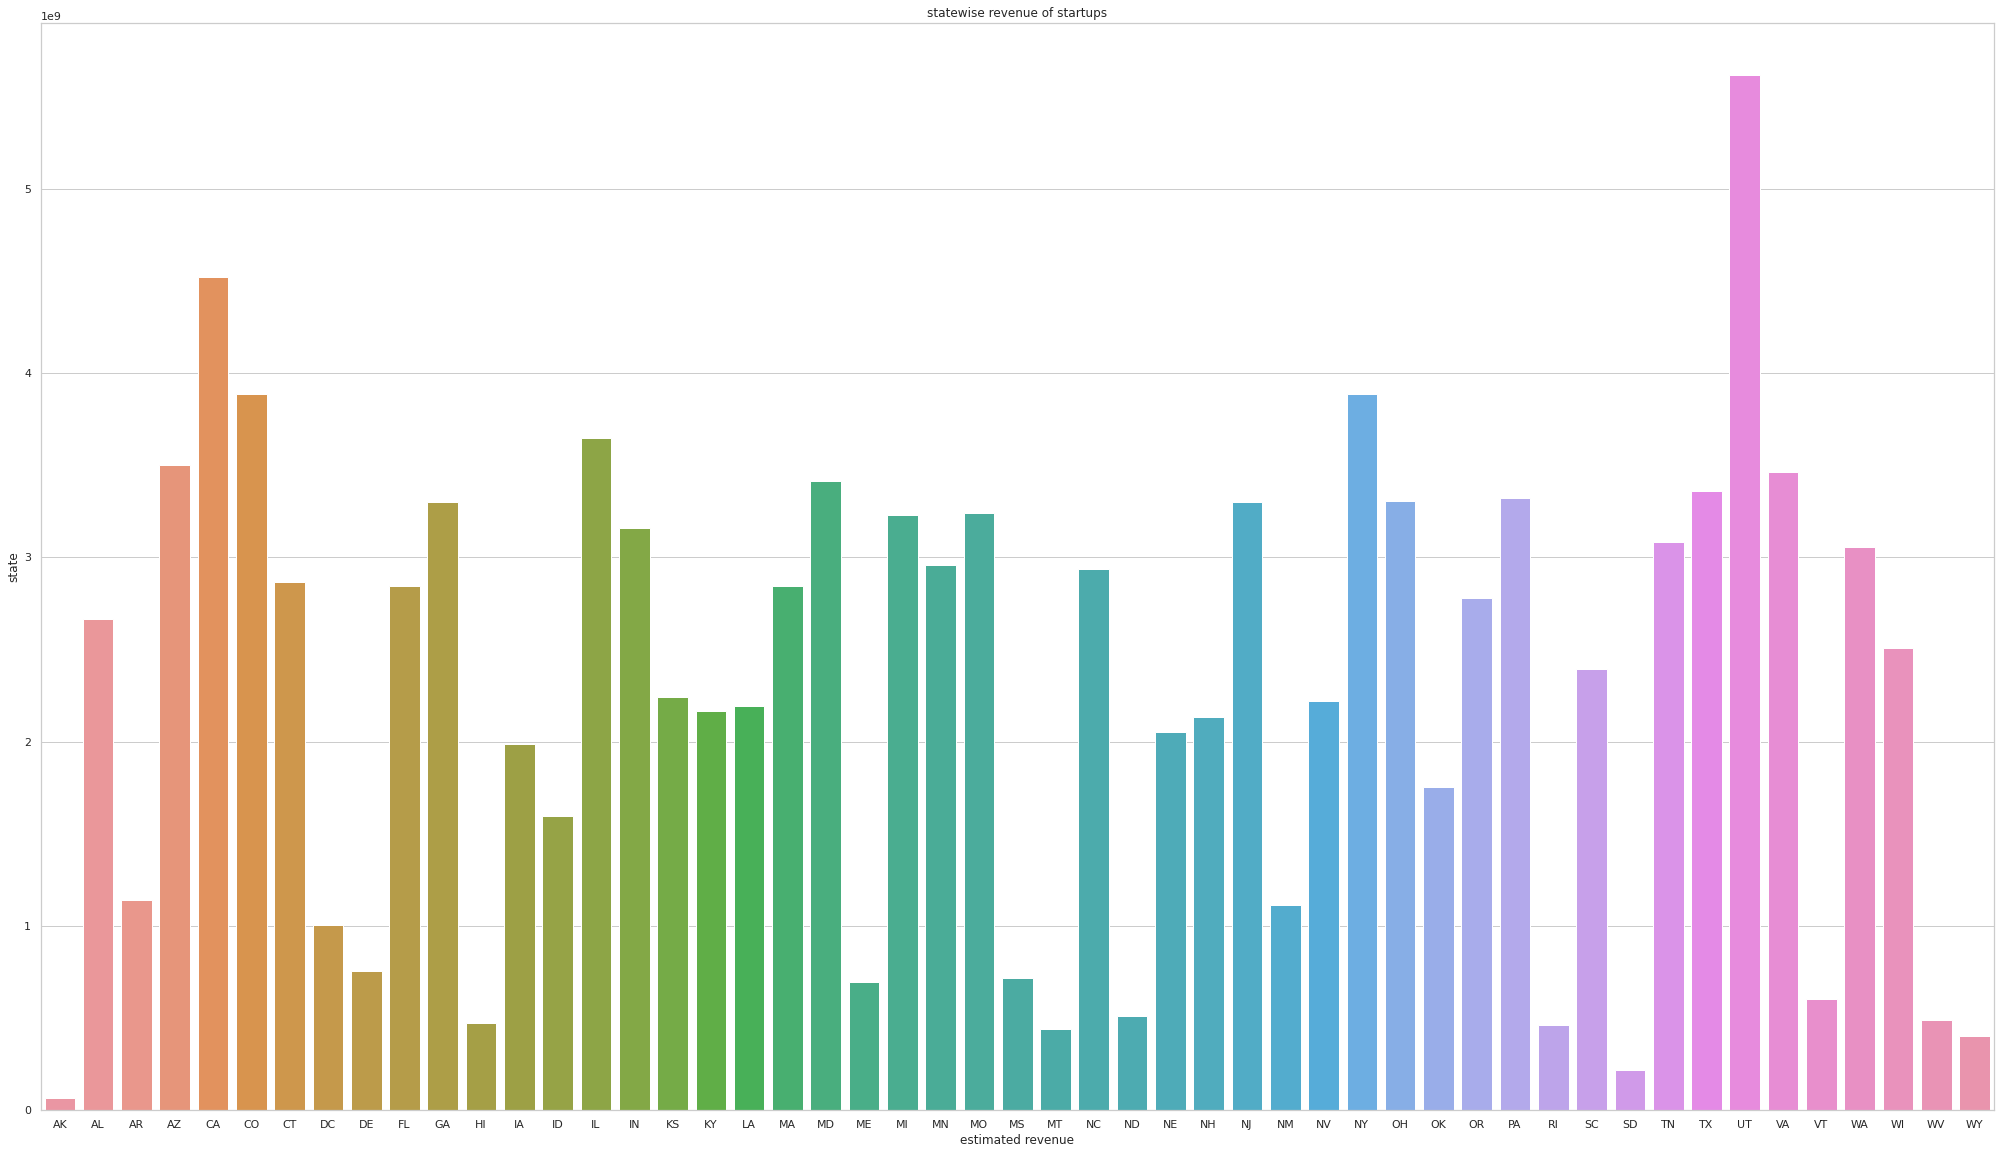

In [ ]:
state_income = df.groupby(['state'])["estimated_revenues"].sum()
from itertools import groupby
plt.figure(figsize=(35,20))
#ax=sns.barplot(x=df.raised,y=df.name)
#ax =sns.barplot(x='estimated_revenues', y='state', data=df, order=df.sort_values('state', ascending = False).state)
ax = sns.barplot(state_income.index, state_income.values)
#plt.xticks(rotation=90)
plt.xlabel("estimated revenue")
plt.ylabel("state")
plt.title("statewise revenue of startups")
plt.show()

states like **VA(Virginia),CA(California),NY(New York),IL(Illinois)** have higher revenue start-ups.

# Industry wise income

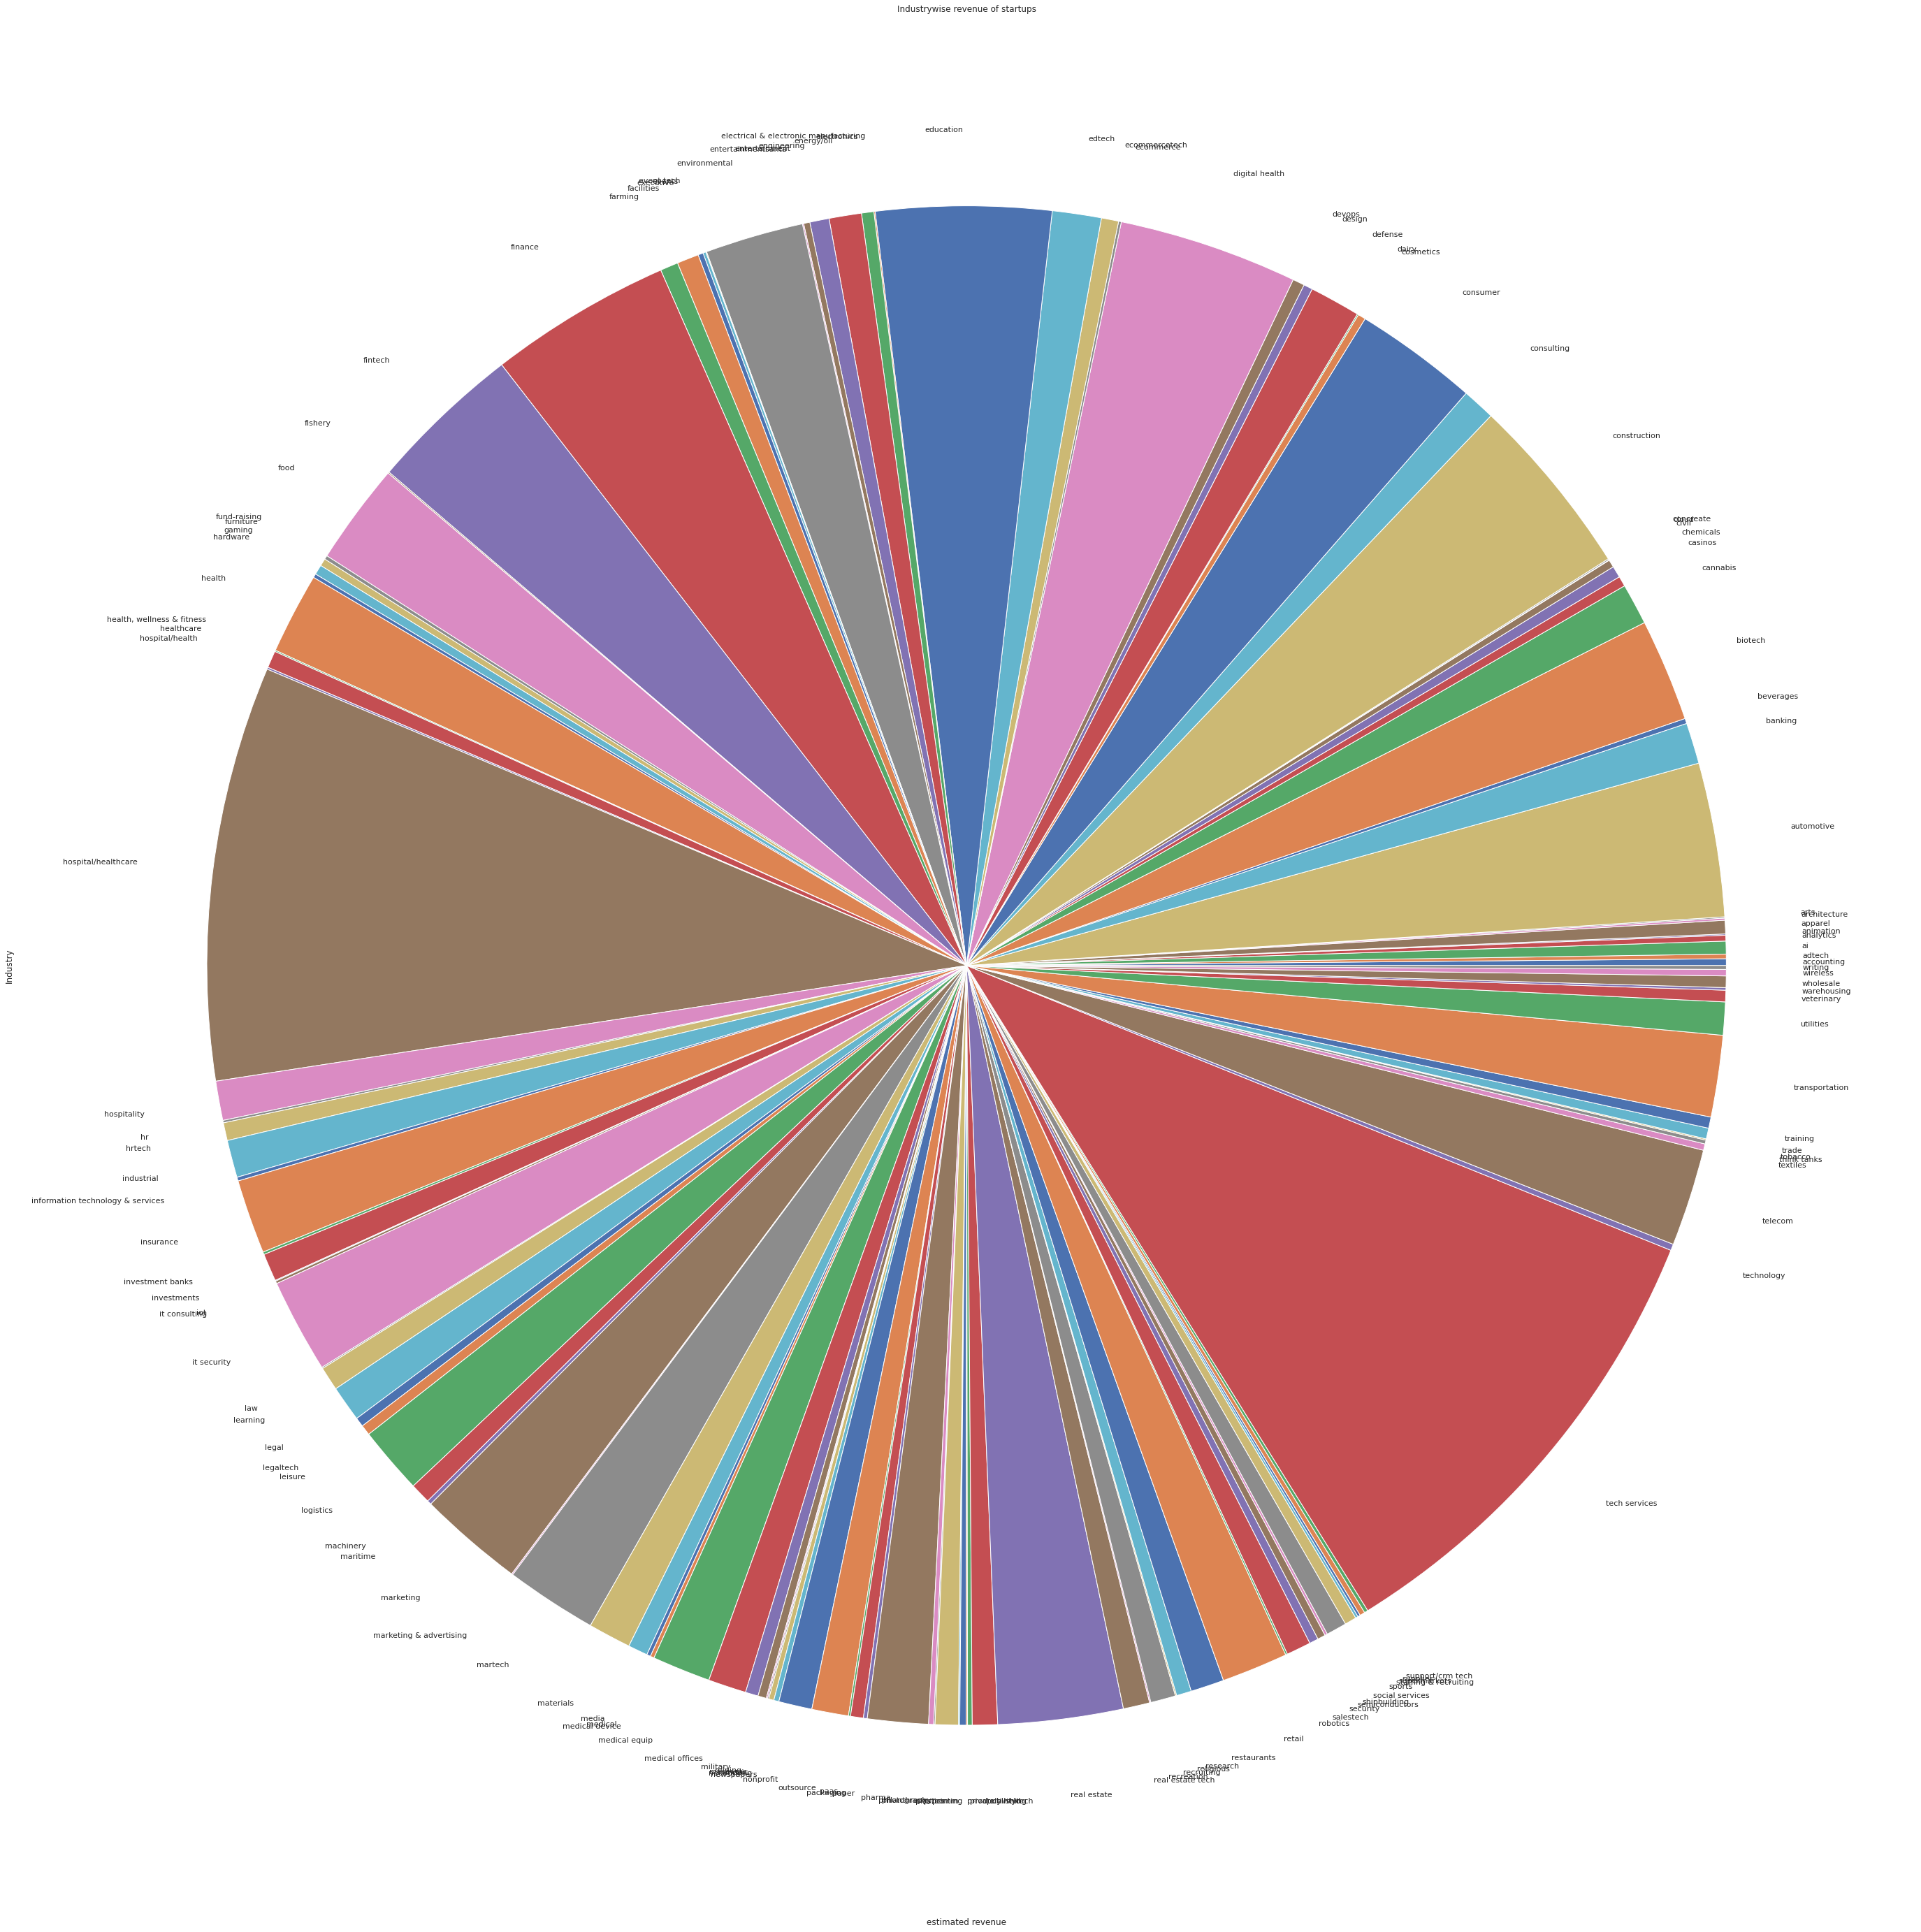

In [ ]:
Industry_income = df.groupby(['Industry'])["estimated_revenues"].sum()
from itertools import groupby
plt.figure(figsize=(100,50))
labels = Industry_income.keys()
#ax=sns.barplot(x=df.raised,y=df.name)
#ax =sns.barplot(x='estimated_revenues', y='state', data=df, order=df.sort_values('state', ascending = False).state)
ax = plt.pie(x = Industry_income,labels=labels,pctdistance=0.5)
#plt.xticks(rotation=90)
plt.xlabel("estimated revenue")
plt.ylabel("Industry")
plt.title("Industrywise revenue of startups")
plt.show()

so, **Tech service and healthcare** are one of the biggest contributor.

# Industry wise growth

In [ ]:
#converting all string to lower to avoid some repetations
df['Industry']=df['Industry'].str.lower()

#removing % sign
df['growth_percentage'] = df['growth_percentage'].replace({'%':''}, regex = True)

#finding growth of start ups in recpective industry
Industry_growth = df.groupby(['Industry'])["growth_percentage"].sum()
print(Industry_growth)
#print(df['growth_percentage'])

Industry
accounting     640
adtech         473
ai             834
analytics      943
animation       65
              ... 
veterinary     453
warehousing     44
wholesale      267
wireless       187
writing        274
Name: growth_percentage, Length: 138, dtype: int64


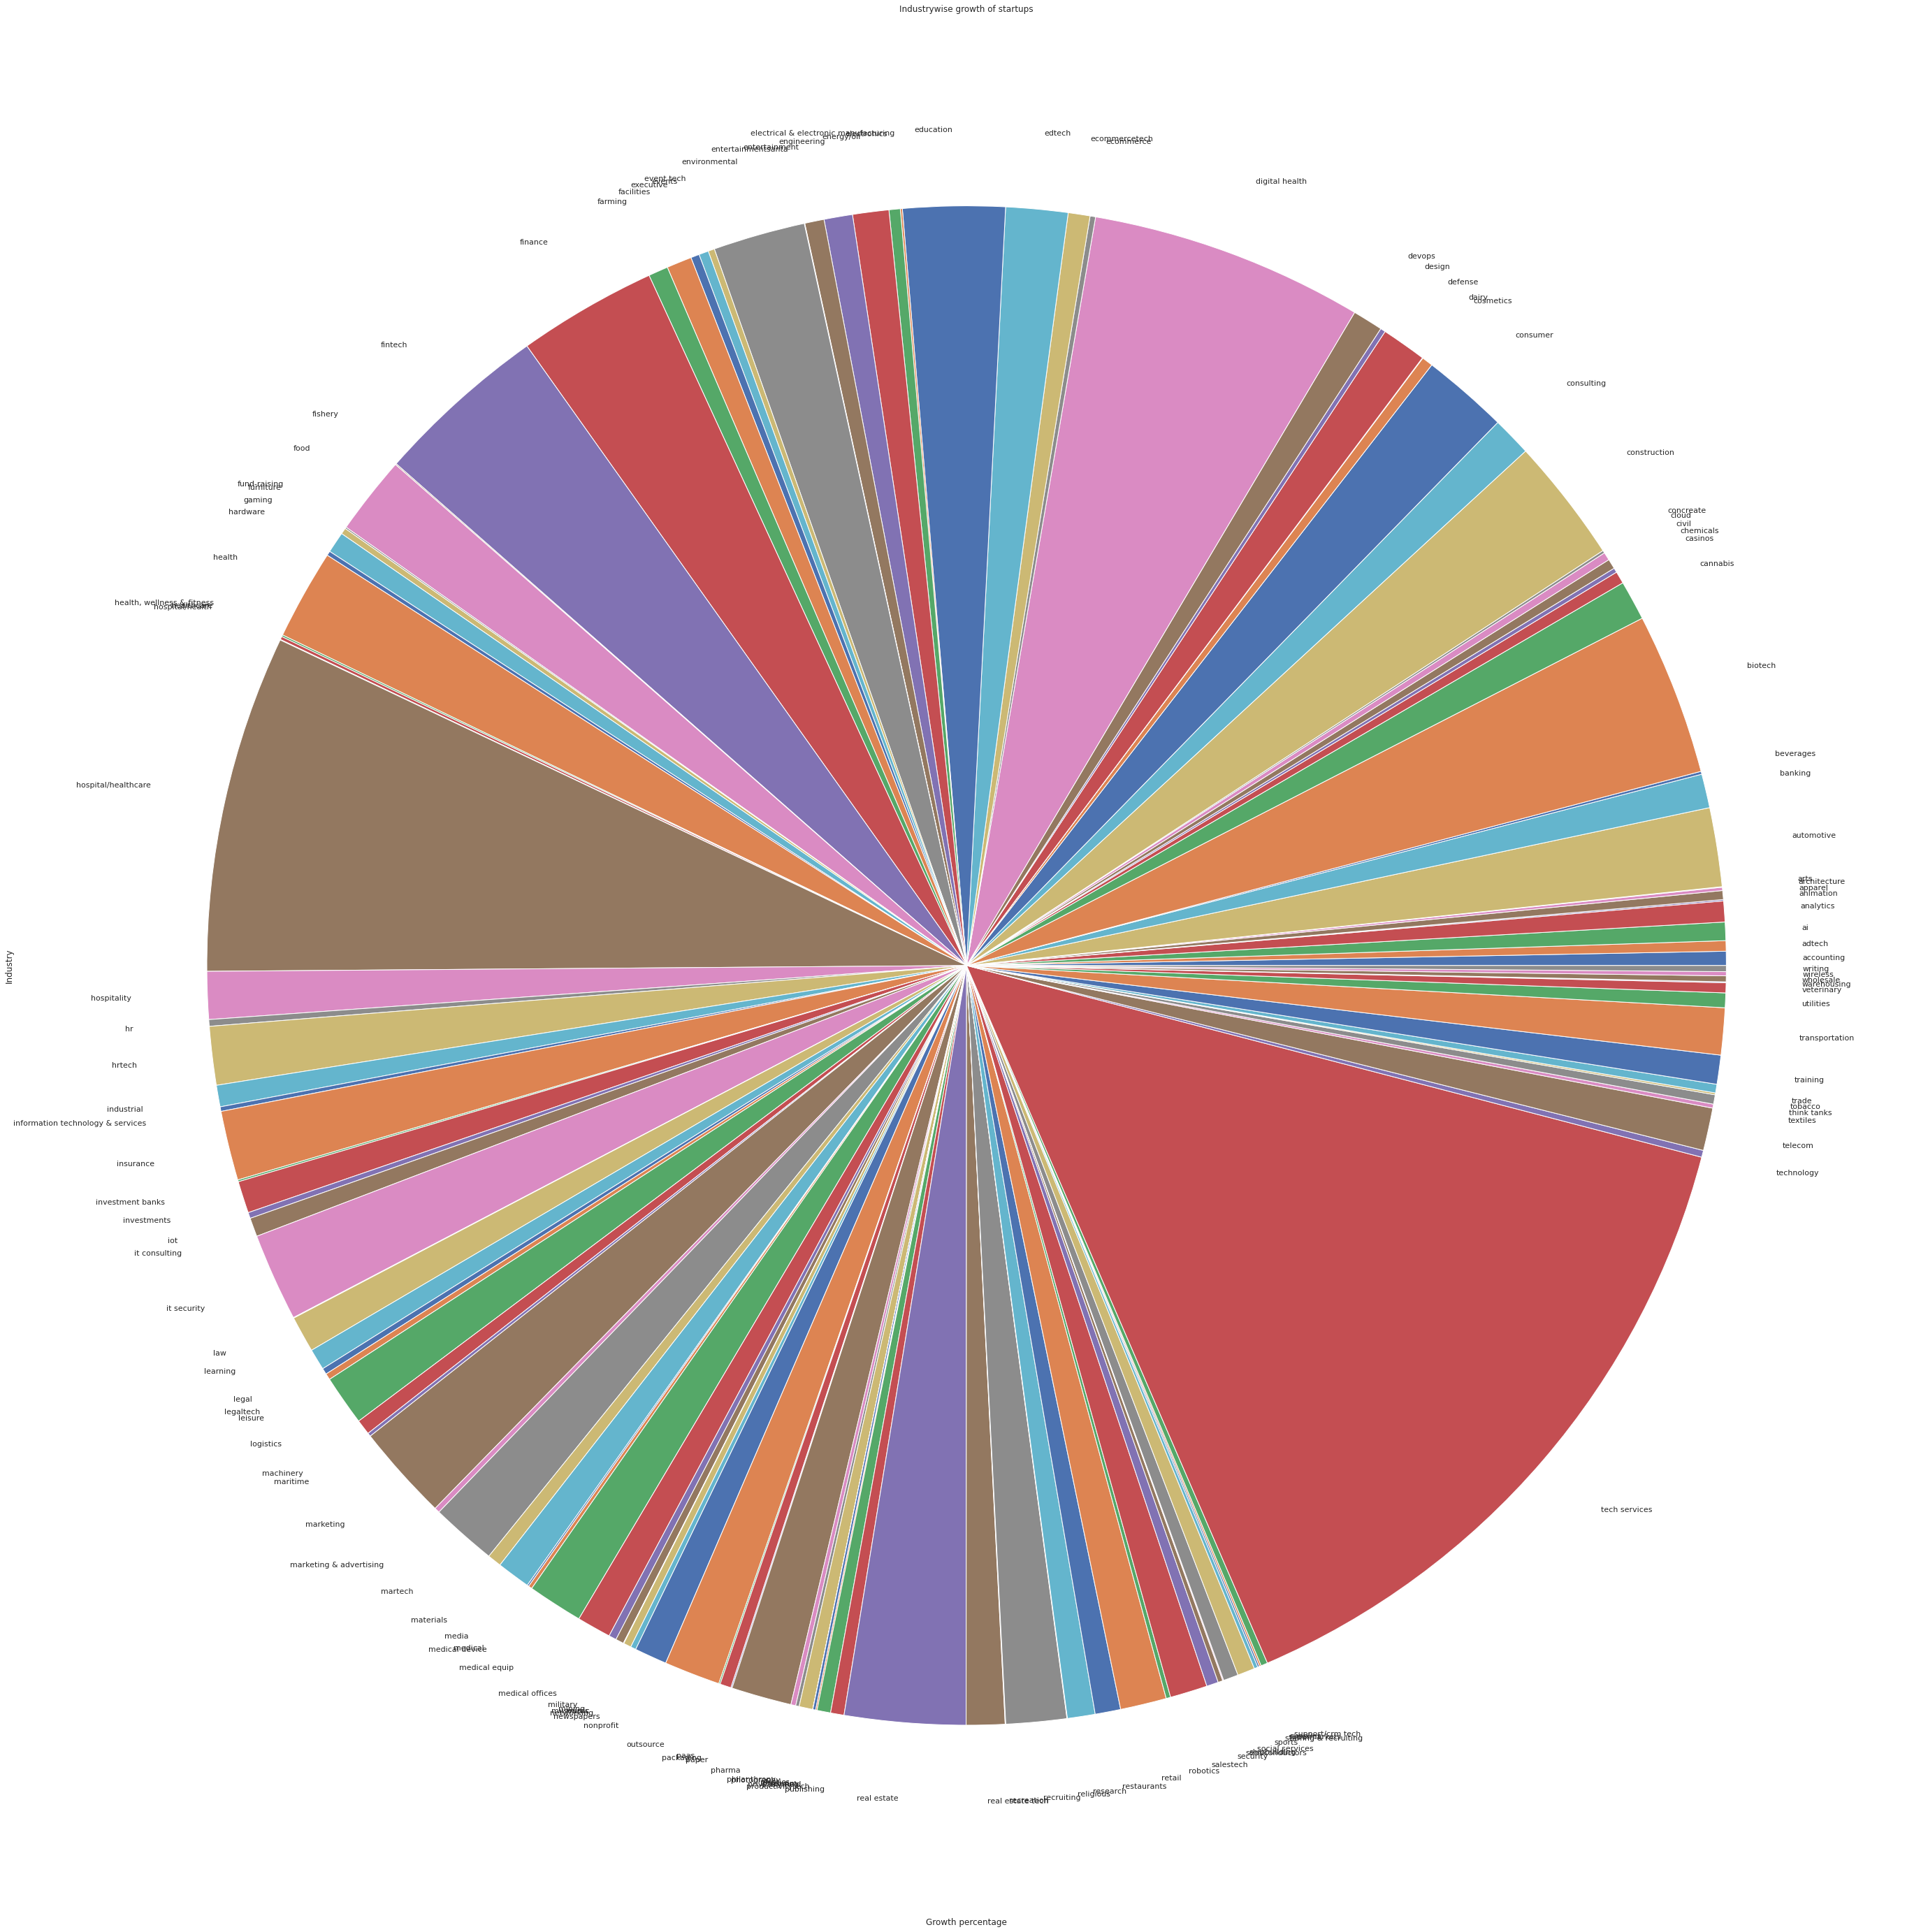

In [ ]:
#Industry_income = df.groupby(['Industry'])["estimated_revenues"].sum()
from itertools import groupby
plt.figure(figsize=(100,50))

#giving labels
labels = Industry_growth.keys()

#ploting
ax = plt.pie(x = Industry_growth,labels=labels,pctdistance=0.5)
#plt.xticks(rotation=90)
plt.xlabel("Growth percentage")
plt.ylabel("Industry")
plt.title("Industrywise growth of startups")
plt.show()

**healthtech and It consulting and bio tech** are high growing industry

# **Founding year wise growth.**

In [ ]:
#finding high growth start up's founding year
df['growth_percentage']=df['growth_percentage'].astype(int)
founding_growth = df.groupby(['founded'])["growth_percentage"].sum()
print(founding_growth)
#print(df['growth_percentage'])

founded
1790.0       11
1798.0       35
1799.0       23
1850.0       42
1855.0       23
          ...  
2016.0    14996
2017.0    21575
2018.0    18545
2019.0    11248
2020.0     7002
Name: growth_percentage, Length: 134, dtype: int64


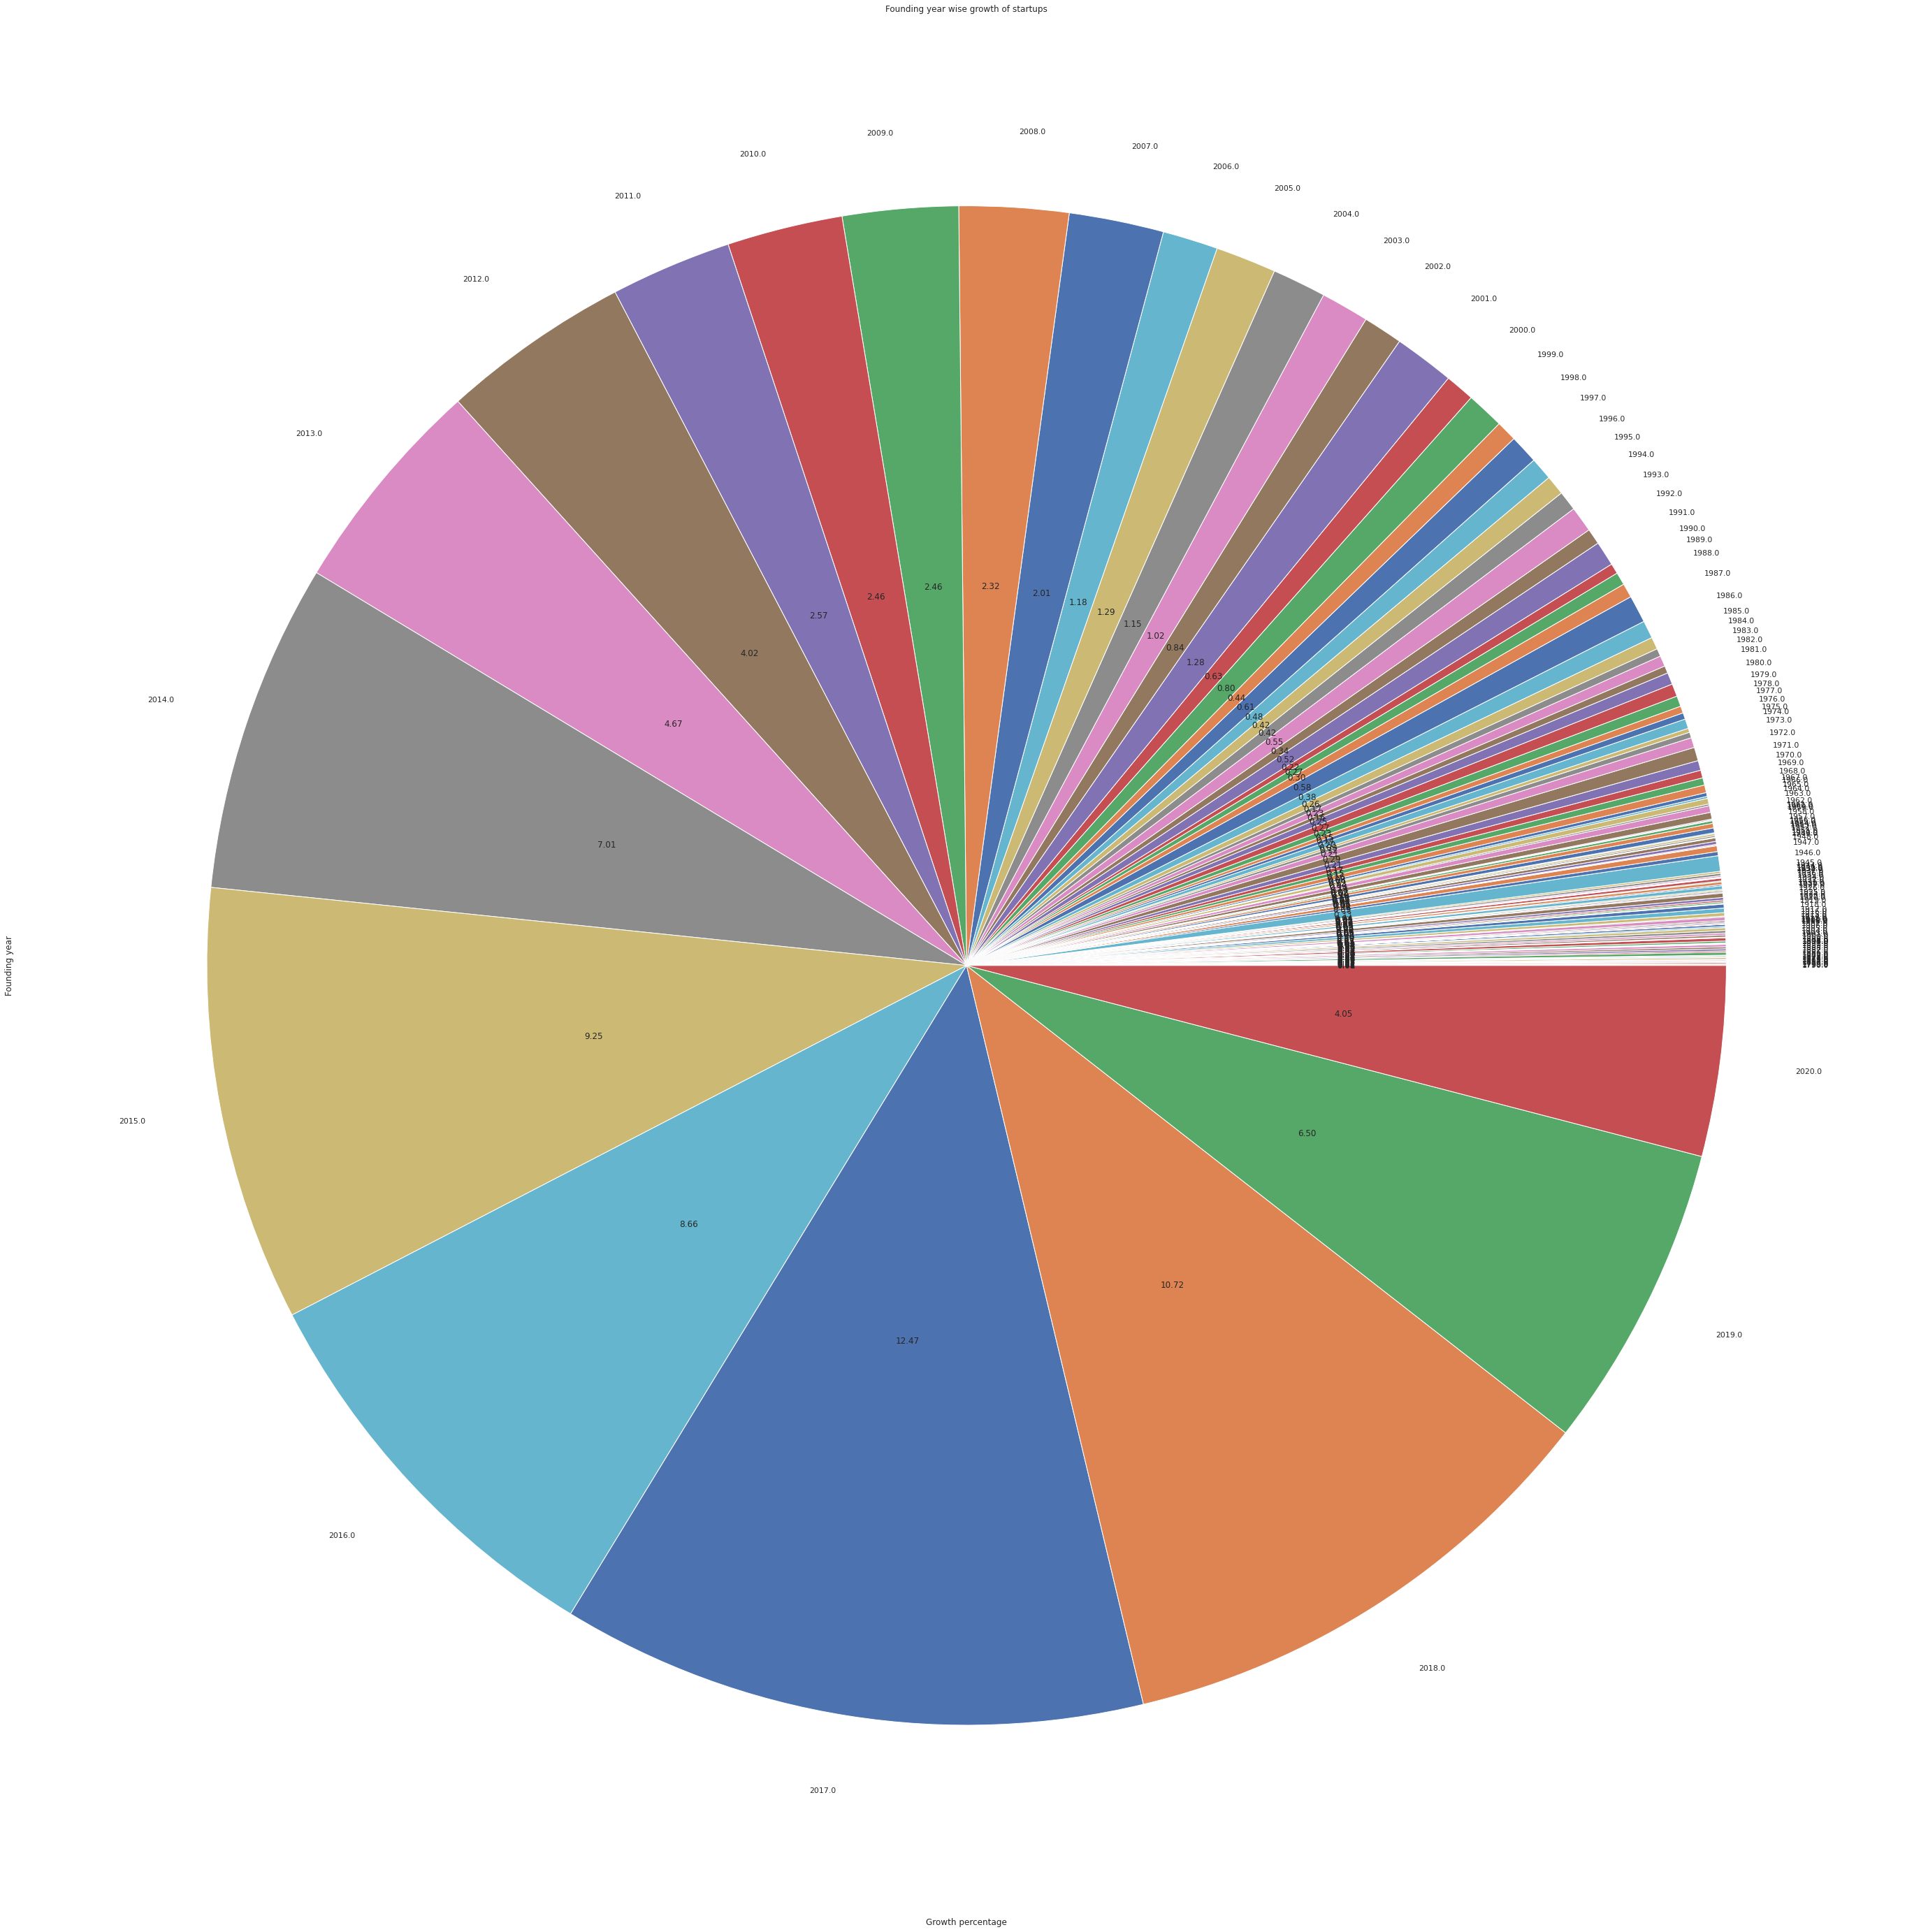

In [ ]:
#Industry_income = df.groupby(['Industry'])["estimated_revenues"].sum()
from itertools import groupby
plt.figure(figsize=(100,50))

#giving labels
labels = founding_growth.keys()

#ploting
ax = plt.pie(x = founding_growth,labels=labels,pctdistance=0.5,autopct='%.2f')
#plt.xticks(rotation=90)
plt.xlabel("Growth percentage")
plt.ylabel("Founding year")
plt.title("Founding year wise growth of startups")
plt.show()

**2017** is highest then followed by **2018 & 2015**, which suggest the **maturing age** of start-ups.

# Employee count on the city ranking.

In [ ]:
employee_cityranking = df.groupby(['CityRanking'])["employees"].mean()
#print(employee_cityranking.describe())

print(employee_cityranking.sort_values(ascending=False))

CityRanking
7135    985.0
2360    965.0
3283    962.0
7566    937.0
7443    916.0
        ...  
6381     30.0
1263     29.0
6300     25.0
5796     23.0
2935     23.0
Name: employees, Length: 1978, dtype: float64


# **Heatmap**

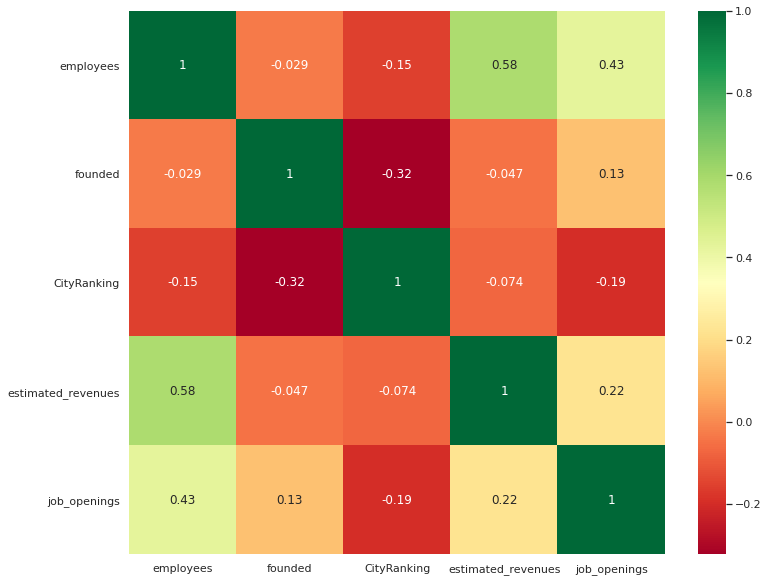

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Here are some high correlated pairs
*   employees & estimated_revenues
*   employees & job openings
*   city ranking and founded(year of founding)
*   job openings and estimated revenues



